In [1]:
import os
import requests
import json
#from nytimesarticle import articleAPI
#api = articleAPI('84146c1ff1b6479b967106c4945c99d7')
# Do not share/upload any keys on Github. You should store them as environment variable.
# export auth_article_key=84146c1ff1b6479b967106c4945c99d7
api_key = os.get_env('auth_article_key')

### Download data using articlesearch api:

In [136]:
#  Get 1000 articles about DONALD TRUMP since 20170101. Put them in json file output1_donald_trump
datalist_1 = []
import time
for i in range(0,100):
    r1 = requests.get("http://api.nytimes.com/svc/search/v2/articlesearch.json?page="
                      +str(i)+"&q=donald+trump&begin_date=20170101&facet_field=source&facet_filter=true&api-key="+api_key)
    time.sleep(1)
    datadict1 = r1.json()
    datalist1 = datadict1["response"]["docs"]
    datalist_1.extend(datalist1) 
print(len(datalist_1))
with open('midterm/data/nytimes/output1_donald_trump', 'w') as f:
    json.dump(datalist_1, f) 

1000


In [134]:
#  Get 1000 articles about HILLARY CLINTON since 20170101. Put them in json file output2_hillary_clinton
datalist_2 = []
import time
for i in range(0,100):
    r2 = requests.get("http://api.nytimes.com/svc/search/v2/articlesearch.json?page="
                      +str(i)+"&q=hillary+clinton&begin_date=20170101&api-key="+api_key)
    time.sleep(1)
    datadict2 = r2.json()
    datalist2 = datadict2["response"]["docs"]
    datalist_2.extend(datalist2) 
print(len(datalist_2))
with open('midterm/data/nytimes/output2_hillary_clinton', 'w') as f:
    f.write(json.dumps(datalist_2))

1000


In [143]:
#  Get 1000 articles about BARACK OBAMA since 20170101. Put them in json file output3_barack_obama
datalist_3 = []
import time
for i in range(0,100):
    r3 = requests.get("http://api.nytimes.com/svc/search/v2/articlesearch.json?page="
                      +str(i)+"&q=barack+obama&begin_date=20170101&api-key="+api_key)
    time.sleep(1)
    datadict3 = r3.json()
    datalist3 = datadict3["response"]["docs"]
    datalist_3.extend(datalist3) 
print(len(datalist_3))
with open('midterm/data/nytimes/output3_barack_obama', 'w') as f:
    f.write(json.dumps(datalist_3))

1000


### Download data using archive api:

In [156]:
# Get all articles in Jan, 2017. Put them in json file output_archive_201701
r = requests.get('http://api.nytimes.com/svc/archive/v1/2017/1.json?api-key='+api_key)
datalist = r.json()["response"]["docs"]
len(datalist)
with open('midterm/data/nytimes/output_archive_201701', 'w') as f:
    json.dump(datalist, f) 

5206

### Read downloaded data from local files

In [176]:
data_Jan = []
with open('midterm/data/nytimes/output_archive_201701', 'r') as data_file:    
    data_Jan = json.load(data_file)
data_Trump = []
with open('midterm/data/nytimes/output1_donald_trump', 'r') as data_file:    
    data_Trump = json.load(data_file)
data_Clinton = []
with open('midterm/data/nytimes/output2_hillary_clinton', 'r') as data_file:    
    data_Clinton = json.load(data_file)
data_Obama = []
with open('midterm/data/nytimes/output3_barack_obama', 'r') as data_file:    
    data_Obama = json.load(data_file)

## Analysis 1. WERE THE SUBJECTS NEUTRAL ABOUT TRUMP IN THE ARTICLES?
### -- Sentiment Analysis On The Subjects Of The Keywords

In [249]:
# Get all the subjects of the articles
keywords = [article['keywords'] for article in data_Trump]
subjects = []
for keyword in keywords:
    subject = [key['value'] for key in keyword if key['name'] == 'subject']
    subjects.extend(subject)
subjects_str = ' '.join(subjects)

In [250]:
# Use AFINN (a list with words and sentiment scores varying from -5 to 5) as a sentiment dictionary 
sentiment_dic = {}
for line in open('midterm/data/AFINN-en-165.txt'):
    word, score = line.split('\t')
    sentiment_dic[word] = int(score)                

In [251]:
from nltk.tokenize import word_tokenize
subjects_words = word_tokenize(subjects_str)
print("Were there any positive words that appeared in the subjects : ", [word for word in subjects_words if sentiment_dic.get(word, 0) > 0])
print("Were there any negtive words that appeared in the subjects : ", [word for word in subjects_words if sentiment_dic.get(word, 0) < 0])

Were there any positive words that appeared in the subjects :  ['asset']
Were there any negtive words that appeared in the subjects :  []


## Analysis 2. WHAT DID THE ARTICLES TALK ABOUT 
### -- Create WordCloud on Trump, Hillary, Obama Respectively

In [195]:
import matplotlib.pyplot as plt
import wordcloud
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

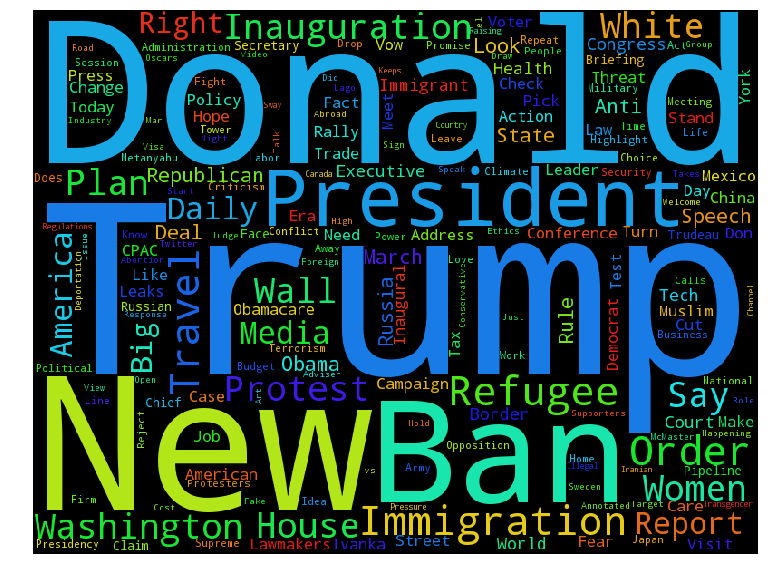

In [197]:
#  Donald Trump
headlines = [article['headline']['main'] for article in data_Trump]
headlines_str = ' '.join(headlines)
wc = wordcloud.WordCloud(width=800, height=600, max_words=200, stopwords=ENGLISH_STOP_WORDS).generate(headlines_str)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

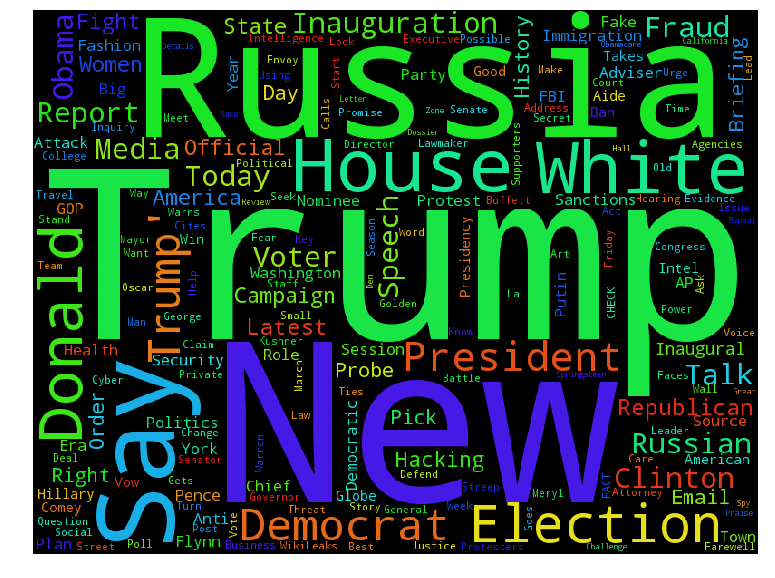

In [198]:
#  Hillary Clinton
headlines = [article['headline']['main'] for article in data_Clinton]
headlines_str = ' '.join(headlines)
wc = wordcloud.WordCloud(width=800, height=600, max_words=200, stopwords=ENGLISH_STOP_WORDS).generate(headlines_str)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

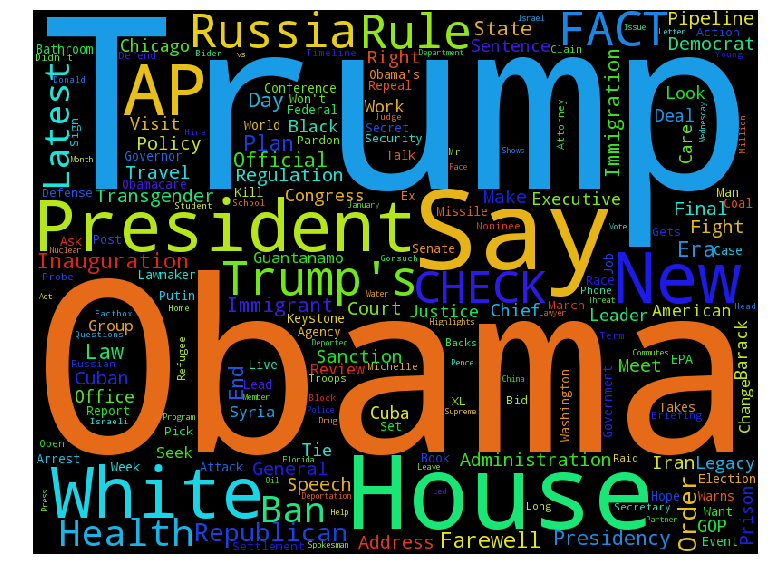

In [199]:
#  Barack Obama
headlines = [article['headline']['main'] for article in data_Obama]
headlines_str = ' '.join(headlines)
wc = wordcloud.WordCloud(width=800, height=600, max_words=200, stopwords=ENGLISH_STOP_WORDS).generate(headlines_str)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

## Analysis 3. WHO WERE MENTIONED THE MOST IN JAN, 2017
### -- Count The Names Appearing In The Keywords

In [177]:
keywords = [article['keywords'] for article in data_Jan]
persons = []
for keyword in keywords:
    person = [key['value'] for key in keyword if key['name'] == 'persons']
    persons.extend(person)

In [190]:
namescount = {}
for person in persons:
    if person in namescount:
        namescount[person] += 1
    else:
        namescount[person] = 1
import operator
namescount_sorted = sorted(namescount.items(), key=operator.itemgetter(1), reverse = True)
print('Top 5 names that were mentioned the most in Jan:')
print(namescount_sorted[:5])
print('"Trump Donald J" were mentions 985 times as a key word!')


Top 5 names that were mentioned the most in Jan:
[('Trump, Donald J', 985), ('Obama, Barack', 148), ('Putin, Vladimir V', 41), ('Sessions, Jefferson B III', 34), ('Cuomo, Andrew M', 34)]
"Trump Donald J" were mentions 985 times as a key word
